- 인공지능 : 특정 분야를 지칭하는 것이 아닌, 지능적 요소가 포함된 기술을 총칭
- 머신러닝 : 데이터에서 모델을 스스로 찾아내는 기법 - sklearn
- 딥러닝 : 심층 신경망을 이용한 머신러닝 기법 - Tensorflow, keras, pytorch

#### 지도학습 : 문제와 정답을 모두 알려주고 공부시키는 방법(특성데이터 + 라벨) - 머신러닝
- 회귀 - 추정((Estimation), 예측
- 분류(Classification)

#### 비지도학습 : 답을 가르쳐주지 않고 공부시키는 방법(특성데이터) - 머신러닝
- 군집화
- 분포추정

#### 강화학습 : 보상을 통해 상은 최대화, 벌은 최소화하는 방향으로 행위를 강화하는 학습 - 딥러닝

In [4]:
# !pip install mglearn

  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582645 sha256=522c469bbf8fa1dfe8f7d25a4846d2e33d71337c268846fdd82f09af0efd4815
  Stored in directory: c:\users\master16\appdata\local\pip\cache\wheels\f1\17\e1\1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston, load_iris
from sklearn.linear_model import LinearRegression,Ridge,SGDRegressor # 학습 : SGDRegressor / 공식 : LinearRegression
from sklearn.neural_network import MLPRegressor # 딥러닝이 들어감 - 은닉층이 들어가 있음
from sklearn.metrics import r2_score # 선형 모델(Linear Models)

from sklearn.model_selection import train_test_split

import mglearn
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [15]:
# x_data = [1,2,3,4,5,6,7,8,9,10] # 벡터(1차원)
x_data1 = np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]])

x_data = np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1, 1)
y_data = np.array([1,2,3,4,5,6,7,8,9,10])

In [16]:
x_data1

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [18]:
x_data.shape

(10, 1)

### n행 1열 : 행(데이터의 개수), 열(특성데이터의 개수)

# 공식을 이용한 선형회귀

In [20]:
model_lr  = LinearRegression() # 공식 사용
model_lr.fit( x_data, y_data ) # 특성데이터는 반드시 행렬(2차원, ndarray)로 줘야 함 / 판다스에서는 데이터프레임 # w와 b값을 구하는 과정

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
model_lr.coef_ # w값(기울기)

array([1.])

In [22]:
model_lr.intercept_ # b값

2.6645352591003757e-15

In [23]:
carDF = pd.read_csv('../data1/cars.csv')
carDF

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16
5,9,10
6,10,18
7,10,26
8,10,34
9,11,17


In [24]:
carDF['speed'] # 시리즈

0      4
1      4
2      7
3      7
4      8
5      9
6     10
7     10
8     10
9     11
10    11
11    12
12    12
13    12
14    12
15    13
16    13
17    13
18    13
19    14
20    14
21    14
22    14
23    15
24    15
25    15
26    16
27    16
28    17
29    17
30    17
31    18
32    18
33    18
34    18
35    19
36    19
37    19
38    20
39    20
40    20
41    20
42    20
43    22
44    23
45    24
46    24
47    24
48    24
49    25
Name: speed, dtype: int64

In [25]:
carDF[['speed']] # 복수개의 행 선택 / 특성데이터를 이렇게 줘야 함 

,speed
0,4
1,4
2,7
3,7
4,8
5,9
6,10
7,10
8,10
9,11


In [26]:
carDF['dist']

0       2
1      10
2       4
3      22
4      16
5      10
6      18
7      26
8      34
9      17
10     28
11     14
12     20
13     24
14     28
15     26
16     34
17     34
18     46
19     26
20     36
21     60
22     80
23     20
24     26
25     54
26     32
27     40
28     32
29     40
30     50
31     42
32     56
33     76
34     84
35     36
36     46
37     68
38     32
39     48
40     52
41     56
42     64
43     66
44     54
45     70
46     92
47     93
48    120
49     85
Name: dist, dtype: int64

In [27]:
modelCar  = LinearRegression() 
modelCar.fit( carDF[['speed']], carDF['dist'] ) # 특성 데이터는 반드시 매트릭스로 주기

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
modelCar.coef_

array([3.93240876])

In [29]:
modelCar.intercept_

-17.57909489051095

In [30]:
# 자동차 속도 15이면 제동거리는 얼마로 예측될까?

modelCar.coef_[0]*15 + modelCar.intercept_

41.40703649635036

In [31]:
modelCar.predict([[15]]) # 1 X 1 # 반드시 매트릭스(행렬)로 주기 : 내부적으로 매트릭스 multiply(행렬곱)를 하기 때문

array([41.4070365])

In [34]:
# 자동차 속도 13, 15

modelCar.predict([[13],[15]]) # 2 X 1  # 그래서 2 X 1 로 출력됨

array([33.54221898, 41.4070365 ])

In [36]:
modelCar.predict(carDF[['speed']])

array([-1.84945985, -1.84945985,  9.94776642,  9.94776642, 13.88017518,
       17.81258394, 21.7449927 , 21.7449927 , 21.7449927 , 25.67740146,
       25.67740146, 29.60981022, 29.60981022, 29.60981022, 29.60981022,
       33.54221898, 33.54221898, 33.54221898, 33.54221898, 37.47462774,
       37.47462774, 37.47462774, 37.47462774, 41.4070365 , 41.4070365 ,
       41.4070365 , 45.33944526, 45.33944526, 49.27185401, 49.27185401,
       49.27185401, 53.20426277, 53.20426277, 53.20426277, 53.20426277,
       57.13667153, 57.13667153, 57.13667153, 61.06908029, 61.06908029,
       61.06908029, 61.06908029, 61.06908029, 68.93389781, 72.86630657,
       76.79871533, 76.79871533, 76.79871533, 76.79871533, 80.73112409])

## 5 X 2   2 X 1
## 5 X 1 행렬이 출력
## 계산은 2 2 처럼 같을 때 가능


In [35]:
x = np.array([[1, 2], [3, 4]])
y = np.array([[3, 4], [5, 6]])
np.matmul(x, y) # x가 반드시 행렬이어야 하고, y도 반드시 행렬이어야 함

array([[13, 16],
       [29, 36]])

In [37]:
carDF[['speed']]

,speed
0,4
1,4
2,7
3,7
4,8
5,9
6,10
7,10
8,10
9,11


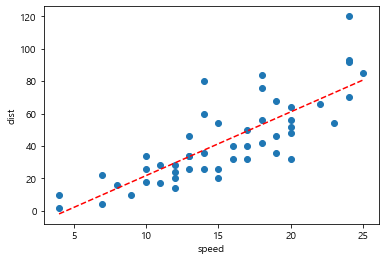

In [40]:
plt.xlabel('speed')
plt.ylabel('dist')
plt.scatter(carDF['speed'], carDF['dist'])
plt.plot(carDF['speed'], modelCar.predict(carDF[['speed']]), 'r--')
plt.show()

### electric.csv -> w, b를 구하고 전기생산량이 3.2인 경우와 4.5인 경우 전기 사용량을 예측하시오.
### scatter(실제 데이터), plot(에측데이터)를 그리시오.

In [43]:
electricDF = pd.read_csv('../data4/electric.csv', index_col='Unnamed: 0')
electricDF.head()

,전기생산량,전기사용량
0,3.52,2.48
1,2.58,2.27
2,3.31,2.47
3,4.07,2.77
4,4.62,2.98


In [51]:
x_data = electricDF[['전기생산량']]
y_data = electricDF[['전기사용량']]

In [52]:
model_lr  = LinearRegression() # 공식 사용
model_lr.fit( x_data, y_data ) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
model_lr.coef_ 

array([[0.49560324]])

In [54]:
model_lr.intercept_

array([0.91958143])

In [55]:
model_lr.predict([[3.2]])

array([[2.50551178]])

In [56]:
model_lr.predict([[4.5]])

array([[3.14979599]])

In [58]:
model_lr.predict([ [3.2] ,[4.5]])

array([[2.50551178],
       [3.14979599]])

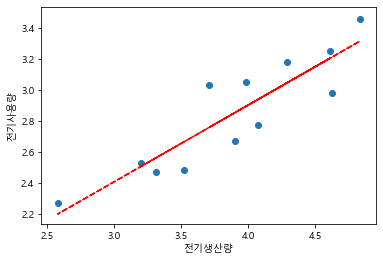

In [59]:
plt.xlabel('전기생산량')
plt.ylabel('전기사용량')
plt.scatter(electricDF['전기생산량'], electricDF['전기사용량'])
plt.plot(electricDF['전기생산량'], model_lr.predict(x_data), 'r--')
plt.show()

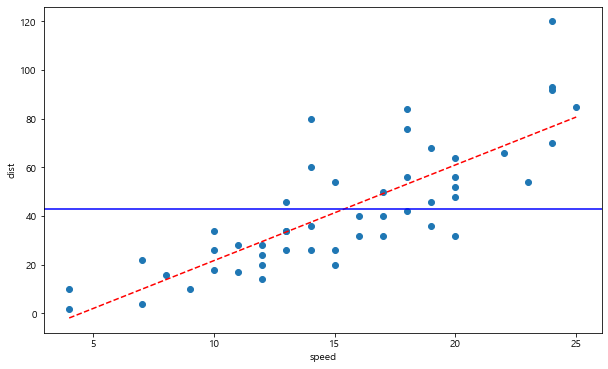

In [60]:
plt.figure( figsize=(10,6))
plt.xlabel('speed')
plt.ylabel('dist')

predictions =modelCar.predict(  carDF[['speed']] )

plt.scatter(carDF.speed, carDF.dist)
plt.plot( carDF.speed, predictions, 'r--') 
plt.axhline( carDF.dist.mean(),color='blue')
plt.show()

# 결정계수 

* 회귀모델의 검증을 위한 또 다른 측정 지표 중 하나로 결정 계수(coefficient of determination, $R^2$) 사용

<h1>
$ SSR( 예측값- 평균값)^2 의합$ <br>
$ SST( 실제값- 평균값)^2 의합$ <br>
$ SSE( 실제값- 예측값)^2 의합$ <br>
$ R^2 = \frac{SSR}{SST} = 1-\frac{SSE}{SST}   $
</h1>

결정 계수 (Coefficient of determination, <br>
R 제곱 (R^2, R-squared, 피어슨 상관 계수의 제곱))<br>
 1 - (오차의 제곱합)/(편차의 제곱합)<br>
오차는 실제 값과 예측 값의 차이<br>
편차는 실제 값과 평균 값의 차이<br>
0 <= 결정 계수 <= 1 (0이면 0점, 1이면 100점)<br>
높을 수록 좋음<br>

from sklearn.metrics import r2_score<br>
y_predict = model.predict( x_data )<br>
r2_score( y_data, y_predict )<br>

### 방법1

In [61]:
modelCar.score(carDF[['speed']], carDF.dist)

0.6510793807582509

### 방법2

In [63]:
from sklearn.metrics import r2_score
y_predict = modelCar.predict(carDF[['speed']])
r2_score(carDF.dist, y_predict) # y_true, y_pred

0.6510793807582509

# 학습을 통한 선형회귀

In [73]:
# alpha=0.0001 (런닝 레이트)
# max_iter=1000 (학습회수) # 디폴트로 1000번 학습하게 되어 있음 
# early_stopping=False (cost값에 변화가 없다, 학습이 되어 최저점에 도달) # cost값이 작으면 학습이 다된줄 알고 빠져나감 - early_stopping
# verbose=1 # 몇 번 학습했는지 같이 출력이 됨

modelSGD = SGDRegressor(max_iter=100, alpha=0.0001, early_stopping=True, verbose=1) 
modelSGD.fit( carDF[['speed']], carDF['dist'])

-- Epoch 1
Norm: 2.09, NNZs: 1, Bias: -0.803339, T: 45, Avg. loss: 919.094180
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.30, NNZs: 1, Bias: -0.910524, T: 90, Avg. loss: 590.472050
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 3.17, NNZs: 1, Bias: -1.185227, T: 135, Avg. loss: 403.671387
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 2.17, NNZs: 1, Bias: -1.464898, T: 180, Avg. loss: 329.528064
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 2.61, NNZs: 1, Bias: -1.638085, T: 225, Avg. loss: 260.241541
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.70, NNZs: 1, Bias: -1.857223, T: 270, Avg. loss: 326.408703
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 3.12, NNZs: 1, Bias: -1.984736, T: 315, Avg. loss: 218.938192
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 3.68, NNZs: 1, Bias: -2.183496, T: 360, Avg. loss: 175.764546
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 3.13, NNZs: 1, Bias: -2.363705, T: 405, Avg. loss: 149.635124
Total train

SGDRegressor(alpha=0.0001, average=False, early_stopping=True, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=100,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=1,
             warm_start=False)

In [74]:
modelSGD.coef_

array([3.12355507])

In [75]:
modelSGD.intercept_

array([-2.55007646])

# 딥러닝을 통한 선형회귀

In [83]:
# hidden_layer_sizes=(100, 10, 3) # 히든 레이어 크기, 출력 개수, 히든 레이어 개수
modelNN = MLPRegressor( max_iter=5000, alpha=0.1, verbose=1, hidden_layer_sizes=(100, 10)) # 히든 레이어 크기와 개수
modelNN.fit(carDF[['speed']], carDF['dist'])

Iteration 1, loss = 1202.49680531
Iteration 2, loss = 1192.38581579
Iteration 3, loss = 1182.34754524
Iteration 4, loss = 1172.40084933
Iteration 5, loss = 1166.68188800
Iteration 6, loss = 1161.50995556
Iteration 7, loss = 1156.16504827
Iteration 8, loss = 1150.69626320
Iteration 9, loss = 1145.12720914
Iteration 10, loss = 1139.48014764
Iteration 11, loss = 1133.71833951
Iteration 12, loss = 1128.18266138
Iteration 13, loss = 1122.59471182
Iteration 14, loss = 1116.78296716
Iteration 15, loss = 1110.85945163
Iteration 16, loss = 1104.82696344
Iteration 17, loss = 1098.69361398
Iteration 18, loss = 1092.46200325
Iteration 19, loss = 1086.14717876
Iteration 20, loss = 1079.73699965
Iteration 21, loss = 1073.23129693
Iteration 22, loss = 1066.63115324
Iteration 23, loss = 1059.93663816
Iteration 24, loss = 1053.14564455
Iteration 25, loss = 1046.25774428
Iteration 26, loss = 1039.27446204
Iteration 27, loss = 1032.19063729
Iteration 28, loss = 1025.00740774
Iteration 29, loss = 1017.727

Iteration 285, loss = 127.98350443
Iteration 286, loss = 127.94146443
Iteration 287, loss = 127.86539636
Iteration 288, loss = 127.80990236
Iteration 289, loss = 127.75352083
Iteration 290, loss = 127.69475528
Iteration 291, loss = 127.63379267
Iteration 292, loss = 127.57309761
Iteration 293, loss = 127.51269025
Iteration 294, loss = 127.47499601
Iteration 295, loss = 127.39737724
Iteration 296, loss = 127.34622498
Iteration 297, loss = 127.29254299
Iteration 298, loss = 127.23453586
Iteration 299, loss = 127.17198198
Iteration 300, loss = 127.10862701
Iteration 301, loss = 127.04972537
Iteration 302, loss = 126.97774615
Iteration 303, loss = 126.91238881
Iteration 304, loss = 126.84471053
Iteration 305, loss = 126.77703156
Iteration 306, loss = 126.69495894
Iteration 307, loss = 126.62241904
Iteration 308, loss = 126.54764339
Iteration 309, loss = 126.47523453
Iteration 310, loss = 126.40826501
Iteration 311, loss = 126.34233886
Iteration 312, loss = 126.27645002
Iteration 313, loss 

Iteration 593, loss = 113.00631957
Iteration 594, loss = 112.99573767
Iteration 595, loss = 112.98485260
Iteration 596, loss = 112.97431674
Iteration 597, loss = 112.96386052
Iteration 598, loss = 112.95376216
Iteration 599, loss = 112.94331363
Iteration 600, loss = 112.93299476
Iteration 601, loss = 112.92273419
Iteration 602, loss = 112.91201148
Iteration 603, loss = 112.90189987
Iteration 604, loss = 112.89151906
Iteration 605, loss = 112.88159780
Iteration 606, loss = 112.87170427
Iteration 607, loss = 112.86218132
Iteration 608, loss = 112.85219084
Iteration 609, loss = 112.84207375
Iteration 610, loss = 112.83360890
Iteration 611, loss = 112.82229296
Iteration 612, loss = 112.81293353
Iteration 613, loss = 112.80323849
Iteration 614, loss = 112.79342273
Iteration 615, loss = 112.78421369
Iteration 616, loss = 112.77453609
Iteration 617, loss = 112.76516387
Iteration 618, loss = 112.75577178
Iteration 619, loss = 112.74636166
Iteration 620, loss = 112.73696521
Iteration 621, loss 

Iteration 899, loss = 111.27123523
Iteration 900, loss = 111.26858385
Iteration 901, loss = 111.26402374
Iteration 902, loss = 111.26751950
Iteration 903, loss = 111.26536091
Iteration 904, loss = 111.25721216
Iteration 905, loss = 111.26233263
Iteration 906, loss = 111.26570874
Iteration 907, loss = 111.26402255
Iteration 908, loss = 111.25959444
Iteration 909, loss = 111.25517618
Iteration 910, loss = 111.25092361
Iteration 911, loss = 111.25914393
Iteration 912, loss = 111.26072655
Iteration 913, loss = 111.25675856
Iteration 914, loss = 111.24855551
Iteration 915, loss = 111.24556269
Iteration 916, loss = 111.24805521
Iteration 917, loss = 111.24559089
Iteration 918, loss = 111.24483717
Iteration 919, loss = 111.24213784
Iteration 920, loss = 111.23615585
Iteration 921, loss = 111.23929670
Iteration 922, loss = 111.24112706
Iteration 923, loss = 111.23830366
Iteration 924, loss = 111.23024000
Iteration 925, loss = 111.23286604
Iteration 926, loss = 111.23498674
Iteration 927, loss 

MLPRegressor(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 10), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=5000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=1, warm_start=False)

In [84]:
modelNN.coefs_

[array([[-2.88581257e-26, -6.00726181e-03,  3.23531693e-01,
          2.28819759e-01, -4.54541031e-02, -6.49106506e-02,
          2.45268569e-01,  2.21110719e-01,  2.50785378e-01,
          2.99026919e-01,  1.86967429e-01,  7.50262270e-26,
          1.65211094e-01,  2.03251939e-26,  1.83663996e-25,
         -3.36604095e-02,  2.98479530e-01,  1.32735071e-01,
          1.85795087e-01, -1.04979345e-07, -5.35809491e-14,
         -3.30559472e-02,  2.39982643e-02, -1.16624327e-24,
          2.67205087e-25,  3.43914833e-01, -1.26729989e-01,
         -8.17579159e-03,  1.49842784e-01,  5.12650926e-15,
          2.43376242e-01,  1.71268012e-01,  1.59319383e-01,
         -2.73548374e-02, -3.20154488e-02, -3.52011284e-02,
          6.71992025e-02, -3.13540919e-03,  1.30313531e-01,
          5.22868524e-02, -2.45994072e-26,  3.33897033e-01,
         -6.08536213e-21,  1.30727934e-01,  2.96821134e-01,
         -1.30957981e-01,  1.92214931e-01, -8.40575310e-03,
          1.38613688e-01,  3.04762056e-0

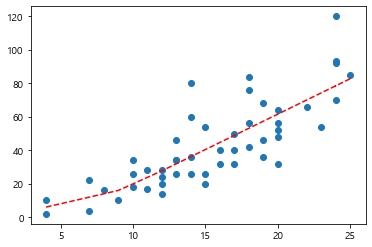

In [85]:
plt.scatter( carDF['speed'],  carDF['dist'])
plt.plot( carDF['speed'], modelNN.predict(carDF[['speed']]), 'r--')
plt.show()

In [ ]:
# 딥러닝이 더 정확도가 높음!